In [4]:
import pickle
import matplotlib.pyplot as plt
import os

In [6]:
# open data
fp =  open(os.path.join(os.getcwd(),'test.txt'))
data = pickle.load(fp)

# pagackes data as ditionary {color: time, x, y}
organized_data = {'red': {'t': [], 'x': [], 'y': []}, 'green': {'t': [], 'x': [],
'y': []}, 'blue': {'t': [], 'x': [], 'y': []}, 'yellow': {'t': [], 'x': [], 'y': []}}

# Organize Data
for i in data:
    color = i[0]
    center = i[1]
    x = center[0]
    y = center[1]
    t = i[2]

    t_list = organized_data.get(color)['t']
    x_list = organized_data.get(color)['x']
    y_list = organized_data.get(color)['y']

    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

    organized_data[color] = {'t': t_list, 'x': x_list, 'y': y_list}


def calculate_angle(data, color1, color2):
    t1_list = data[color1]['t']
    t2_list = data[color2]['t']
    x1_list = data[color1]['x']
    x2_list = data[color2]['x']
    y1_list = data[color1]['y']
    y2_list = data[color2]['y']

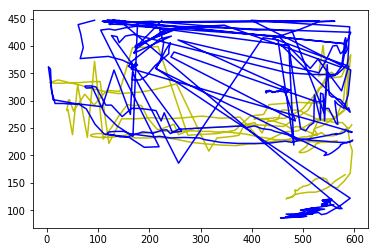

In [7]:
plt.plot(organized_data['yellow']['x'], organized_data['yellow']['y'], 'y')
plt.plot(organized_data['blue']['x'], organized_data['blue']['y'], 'b')
plt.show()